In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0dc4f5b3f209732cef8733e3b679309


In [9]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
#Create an empty list to hold the weather data.
city_data=[]
#Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | saleaula
City not found. Skipping...
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | kodinsk
Processing Record 4 of Set 1 | yulara
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | samdari
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | itarema
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | morros
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | esna
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | carthage
Processing Record 21 of Set 1 | matay
Processing Record

Processing Record 38 of Set 4 | honiara
Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | sur
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | bolshiye chapurniki
City not found. Skipping...
Processing Record 43 of Set 4 | constantine
Processing Record 44 of Set 4 | katherine
Processing Record 45 of Set 4 | polyarnyy
Processing Record 46 of Set 4 | finschhafen
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | tignere
Processing Record 49 of Set 4 | wuwei
Processing Record 50 of Set 4 | bonthe
Processing Record 1 of Set 5 | necochea
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | shimoda
Processing Record 4 of Set 5 | ust-kalmanka
Processing Record 5 of Set 5 | pacific grove
Processing Record 6 of Set 5 | zapolyarnyy
Processing Record 7 of Set 5 | brigantine
Processing Record 8 of Set 5 | juegang
Processing Record 9 of Set 5 | makakilo city
Processing Record 10 

Processing Record 28 of Set 8 | yangambi
Processing Record 29 of Set 8 | half moon bay
Processing Record 30 of Set 8 | chimbote
Processing Record 31 of Set 8 | mapiri
Processing Record 32 of Set 8 | acapulco
Processing Record 33 of Set 8 | cockburn town
Processing Record 34 of Set 8 | huimanguillo
Processing Record 35 of Set 8 | sinop
Processing Record 36 of Set 8 | jumla
Processing Record 37 of Set 8 | apiai
Processing Record 38 of Set 8 | gat
Processing Record 39 of Set 8 | aguililla
Processing Record 40 of Set 8 | tual
Processing Record 41 of Set 8 | tulagi
Processing Record 42 of Set 8 | bilma
Processing Record 43 of Set 8 | copiapo
Processing Record 44 of Set 8 | amalapuram
Processing Record 45 of Set 8 | mwene-ditu
Processing Record 46 of Set 8 | vilcun
Processing Record 47 of Set 8 | zig
Processing Record 48 of Set 8 | xinzhi
Processing Record 49 of Set 8 | chinhoyi
Processing Record 50 of Set 8 | goderich
Processing Record 1 of Set 9 | oloron-sainte-marie
Processing Record 2 of

Processing Record 13 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 14 of Set 12 | saint george
Processing Record 15 of Set 12 | salalah
Processing Record 16 of Set 12 | makungu
Processing Record 17 of Set 12 | awjilah
Processing Record 18 of Set 12 | huancabamba
Processing Record 19 of Set 12 | longyan
Processing Record 20 of Set 12 | griffith
Processing Record 21 of Set 12 | gimbi
Processing Record 22 of Set 12 | synya
Processing Record 23 of Set 12 | houston
Processing Record 24 of Set 12 | yurimaguas
Processing Record 25 of Set 12 | bukama
Processing Record 26 of Set 12 | gataivai
Processing Record 27 of Set 12 | karwar
Processing Record 28 of Set 12 | phalaborwa
Processing Record 29 of Set 12 | tuy hoa
Processing Record 30 of Set 12 | port arthur
Processing Record 31 of Set 12 | marcona
City not found. Skipping...
Processing Record 32 of Set 12 | sarti
Processing Record 33 of Set 12 | rosetown
Processing Record 34 of Set 12 | port-gentil
Processing Record

In [11]:
len(city_data)

541

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodinsk,58.69,99.18,44.71,55,17,2.84,RU,2020-04-27 18:29:34
1,Yulara,-25.24,130.99,66.20,48,1,4.70,AU,2020-04-27 18:29:35
2,Port Lincoln,-34.73,135.87,60.19,73,99,10.80,AU,2020-04-27 18:25:43
3,Punta Arenas,-53.15,-70.92,41.00,93,75,8.05,CL,2020-04-27 18:29:35
4,Samdari,25.82,72.58,90.90,17,0,7.63,IN,2020-04-27 18:29:35
5,Bambous Virieux,-20.34,57.76,75.20,78,75,18.34,MU,2020-04-27 18:29:35
6,Itarema,-2.92,-39.92,79.11,88,95,13.56,BR,2020-04-27 18:29:36
7,Ushuaia,-54.80,-68.30,50.00,66,63,1.43,AR,2020-04-27 18:25:55
8,Kapaa,22.08,-159.32,75.20,83,75,14.99,US,2020-04-27 18:25:26
9,Morros,-9.45,-46.30,83.17,55,41,10.54,BR,2020-04-27 18:29:36


In [13]:
new_column_order = ["City","Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodinsk,RU,2020-04-27 18:29:34,58.69,99.18,44.71,55,17,2.84
1,Yulara,AU,2020-04-27 18:29:35,-25.24,130.99,66.20,48,1,4.70
2,Port Lincoln,AU,2020-04-27 18:25:43,-34.73,135.87,60.19,73,99,10.80
3,Punta Arenas,CL,2020-04-27 18:29:35,-53.15,-70.92,41.00,93,75,8.05
4,Samdari,IN,2020-04-27 18:29:35,25.82,72.58,90.90,17,0,7.63
...,...,...,...,...,...,...,...,...,...
536,Arlit,NE,2020-04-27 18:31:50,18.74,7.39,97.11,7,30,7.09
537,Kuala Lipis,MY,2020-04-27 18:31:50,4.18,102.05,74.16,94,100,1.86
538,Rocky Mountain House,CA,2020-04-27 18:27:22,52.37,-114.92,55.87,25,95,6.67
539,Springbok,ZA,2020-04-27 18:31:51,-29.66,17.89,63.23,38,0,4.29


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/27/20'

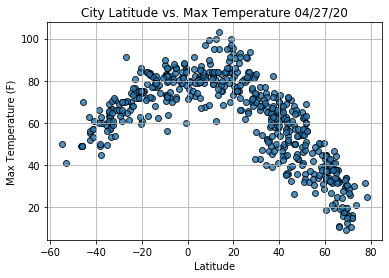

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

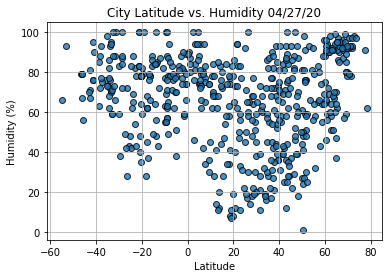

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

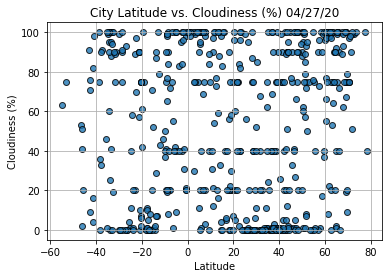

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

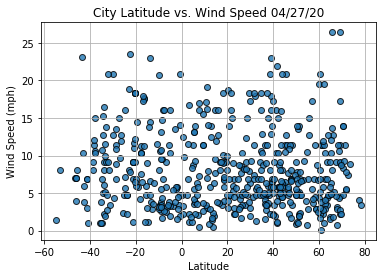

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

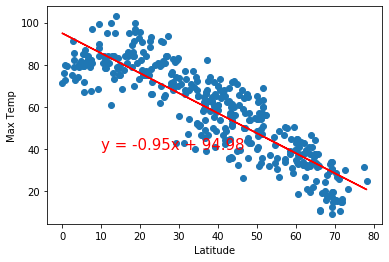

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

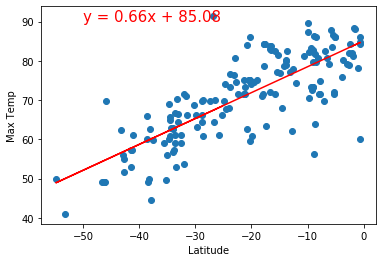

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

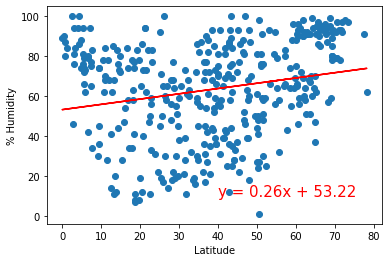

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

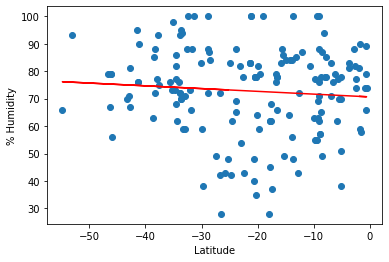

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

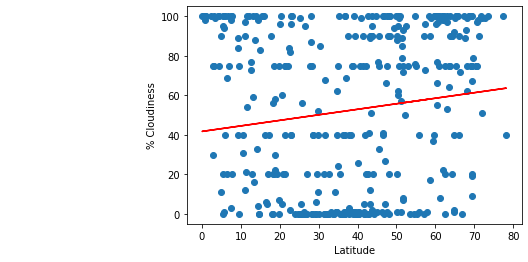

In [35]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

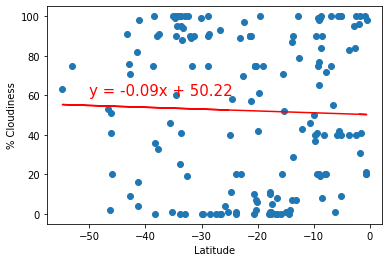

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

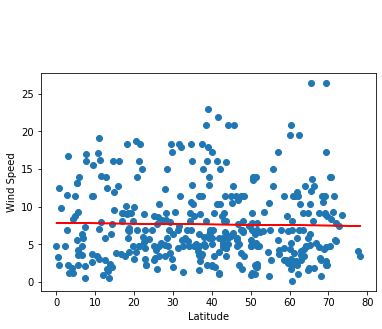

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

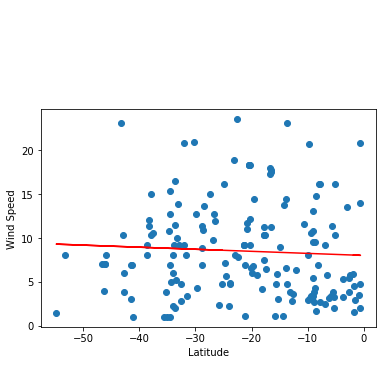

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))